Name, Heading , Etc.

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

In [4]:
!head 10 2013_movies.csv

head: 10: No such file or directory
==> 2013_movies.csv <==












In [69]:
df=pd.read_csv('2013_movies.csv')
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


#Challenge 1

#Performing a regression using a constant parameter will always produce a uniform model that has no variation. As such r^2 will always be 0 and the model should simply always predict the mean for the dependent variable.

In [70]:
df['constant']=1
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,constant
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


In [71]:
y,x=df.DomesticTotalGross, df.constant
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 21 Jul 2016   Prob (F-statistic):                nan
Time:                        16:54:51   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
constant    1.006e+08   8.74e+06     11.510      0.000      8.33e+07  1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Below is a histogram of the residuals. It's intriguing that overestimates have a much larger spread than do underestimates.

#This indicates that there are some outliers with 

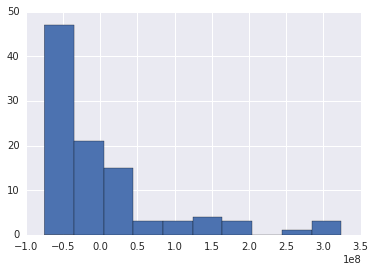

In [81]:
results.resid.hist()

In [77]:
# manually calculate residuals df.DomesticTotalGross - results.predict(df.constant)

<function matplotlib.pyplot.show>

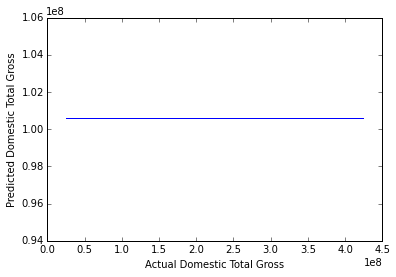

In [58]:
#predictions=pd.Series([results.predict(num) for num in df.constant])

plt.plot(df.DomesticTotalGross,predictions)
plt.xlabel('Actual Domestic Total Gross')
plt.ylabel('Predicted Domestic Total Gross')
plt.show

In [93]:
#df.plot('Runtime','DomesticTotalGross',kind='scatter')

In [94]:
#df.plot('Runtime','DomesticTotalGross',kind='scatter')

In [82]:
# residuals=(df.DomesticTotalGross-predictions)
# plt.hist(residuals.apply(lambda x: x[0]), bins=10)
# plt.show()

In [83]:
residuals.describe()

count                100
unique               100
top       [-36682708.22]
freq                   1
dtype: object

#Challenge 2
#My intuition is that budget will have some correlation with Domestic Total

#Gross. Unfortunately, since not all of the entries contain a budget, I chose to run regression on the subset of the data set that did have such information. This was 89% of the original dataset.

In [84]:
has_budget=df[df.Budget.notnull()]
has_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 99
Data columns (total 8 columns):
Title                 89 non-null object
Budget                89 non-null float64
DomesticTotalGross    89 non-null int64
Director              87 non-null object
Rating                89 non-null object
Runtime               89 non-null int64
ReleaseDate           89 non-null object
constant              89 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.3+ KB


In [98]:
y,x=has_budget.DomesticTotalGross, has_budget.Budget
model = sm.OLS(y, x)
results2 = model.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     172.5
Date:                Thu, 21 Jul 2016   Prob (F-statistic):           1.91e-22
Time:                        17:26:01   Log-Likelihood:                -1743.9
No. Observations:                  89   AIC:                             3490.
Df Residuals:                      88   BIC:                             3492.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Budget         1.1502      0.088     13.132      0.000         0.976     1.324
==============================================================================
Omnibus:                       17.536   Durbin-Watson:                   1.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.708
Skew:                           0.737   Prob(JB):                     7.90e-08
Kurtosis:                       5.579   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

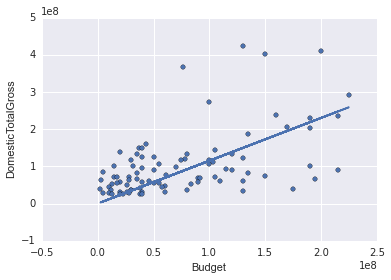

In [107]:
ax2=has_budget.plot('Budget','DomesticTotalGross', kind='scatter')
ax2.plot(has_budget.Budget, results2.predict(has_budget.Budget))

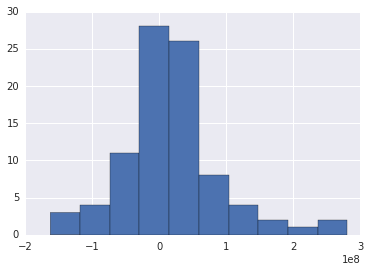

In [100]:
results2.resid.hist()

#Challenge 3: OLS Regression X1=Rating X2=Budget Y=Domestic Total Gross

In [101]:
from patsy import dmatrices

In [102]:
y3, x3 = dmatrices('DomesticTotalGross ~ Rating + Budget', data=has_budget, return_type='dataframe')

In [103]:
x3.head()

,Intercept,Rating[T.PG-13],Rating[T.R],Budget
0,1,1,0,130000000
1,1,1,0,200000000
2,1,0,0,150000000
3,1,0,0,76000000
4,1,1,0,225000000


In [104]:
y3.head()

,DomesticTotalGross
0,424668047
1,409013994
2,400738009
3,368061265
4,291045518


In [105]:
model3 = sm.OLS(y3, x3)
results3 = model.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     172.5
Date:                Thu, 21 Jul 2016   Prob (F-statistic):           1.91e-22
Time:                        17:44:53   Log-Likelihood:                -1743.9
No. Observations:                  89   AIC:                             3490.
Df Residuals:                      88   BIC:                             3492.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Budget         1.1502      0.088     13.132      0.000         0.976     1.324
==============================================================================
Omnibus:                       17.536   Durbin-Watson:                   1.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.708
Skew:                           0.737   Prob(JB):                     7.90e-08
Kurtosis:                       5.579   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Clearly adding the categorical variable has not increased the predictive power of our model.

#Below is a histogram of the residuals: looks more or less like a nice normal distribution.

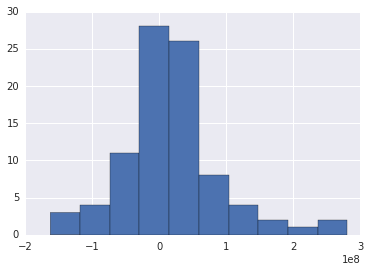

In [106]:
results3.resid.hist()

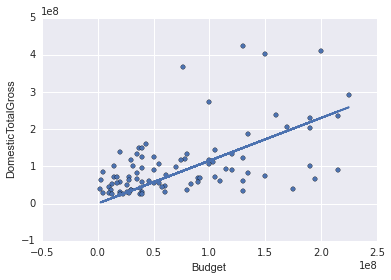

In [108]:
ax3=has_budget.plot('Budget','DomesticTotalGross', kind='scatter')
ax3.plot(has_budget.Budget, results3.predict(has_budget.Budget))

#Challenge 4

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112071d10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111465e90>]], dtype=object)

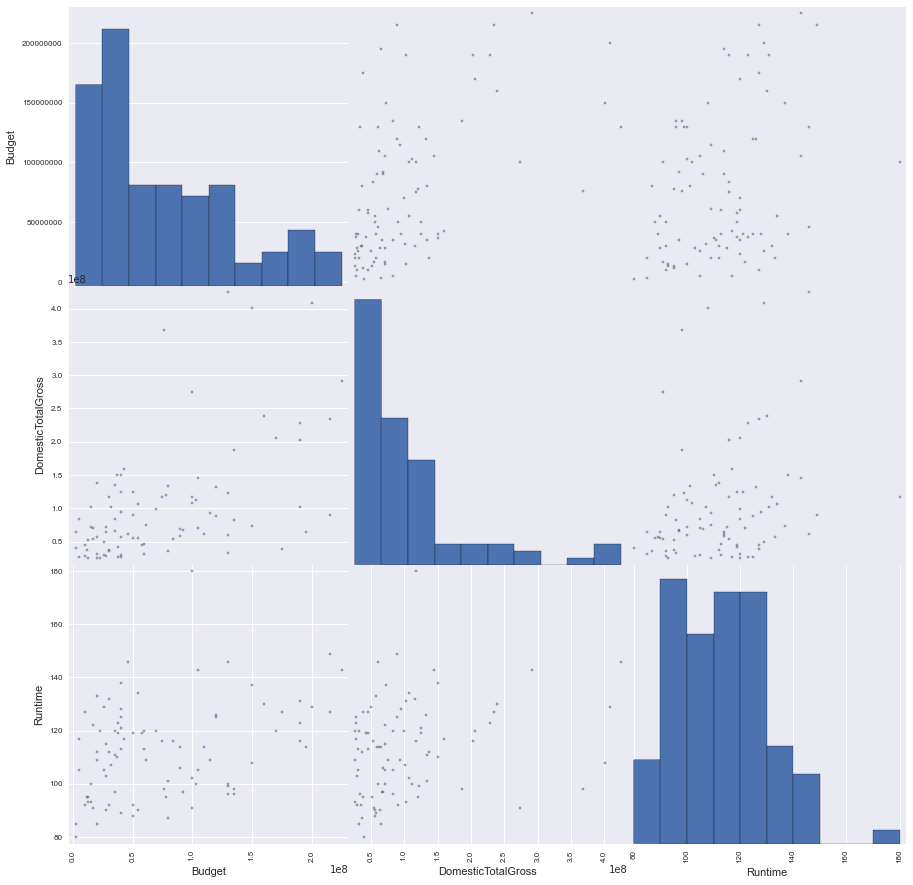

In [111]:
pd.tools.plotting.scatter_matrix(has_budget[['Budget','DomesticTotalGross','Runtime']], figsize=(15,15))

In [112]:
has_budget['log_budget']=np.log(has_budget.Budget)
has_budget['log_dom_tot_gross']=np.log(has_budget.DomesticTotalGross)

/Users/matthewmitchell/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/matthewmitchell/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cbf7690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x110ea4ed0>]], dtype=object)

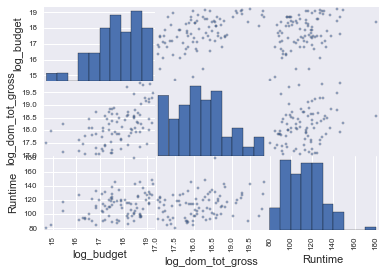

In [113]:
pd.tools.plotting.scatter_matrix(has_budget[['log_budget','log_dom_tot_gross','Runtime']])

In [114]:
y4, x4 = dmatrices('DomesticTotalGross ~ log_budget + Runtime', data=has_budget, return_type='dataframe')
model4 = sm.OLS(y4, x4)
results4 = model.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     172.5
Date:                Thu, 21 Jul 2016   Prob (F-statistic):           1.91e-22
Time:                        18:15:38   Log-Likelihood:                -1743.9
No. Observations:                  89   AIC:                             3490.
Df Residuals:                      88   BIC:                             3492.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Budget         1.1502      0.088     13.132      0.000         0.976     1.324
==============================================================================
Omnibus:                       17.536   Durbin-Watson:                   1.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.708
Skew:                           0.737   Prob(JB):                     7.90e-08
Kurtosis:                       5.579   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Challenge 5

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation as cv
from sklearn import metrics

In [161]:
has_budget.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,constant,log_budget,log_dom_tot_gross
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1,18.683045,19.866818
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1,19.113828,19.829260
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1,18.826146,19.808818
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1,18.146244,19.723760
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1,19.231611,19.488990


In [126]:
y5, x5 = dmatrices('DomesticTotalGross ~ log_budget + Runtime', data=has_budget, return_type='dataframe')
model = LinearRegression()

x_train5, x_test5, y_train5, y_test5 = cv.train_test_split(x5 , y5, test_size=0.25, random_state=13)

model5 = sm.OLS(y_train5, x_train5)
results5 = model5.fit()
results5.summary()

# model5 = LinearRegression().fit(x_train, y_train)

# model.fit(X, y)
# model.score(X, y)
# model.coef_
# model.intercept_

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     7.681
Date:                Fri, 22 Jul 2016   Prob (F-statistic):            0.00103
Time:                        12:29:56   Log-Likelihood:                -1297.3
No. Observations:                  66   AIC:                             2601.
Df Residuals:                      63   BIC:                             2607.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -6.135e+08   1.88e+08     -3.261      0.002     -9.89e+08 -2.38e+08
log_budget  3.743e+07   1.13e+07      3.303      0.002      1.48e+07  6.01e+07
Runtime     5.135e+05   6.58e+05      0.780      0.438     -8.02e+05  1.83e+06
==============================================================================
Omnibus:                       28.416   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.604
Skew:                           1.595   Prob(JB):                     4.60e-11
Kurtosis:                       5.671   Cond. No.                     2.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Seems weak. Let's run the previous model using Budget rather than log_budget.
#Note: wouldn't it make more sense to run several random splits and look at distributions of each of these statistics to get a more detailed picture of how models vary?

In [162]:
y5, x5 = dmatrices('DomesticTotalGross ~ Budget + Runtime', data=has_budget, return_type='dataframe')
model = LinearRegression()

x_train5, x_test5, y_train5, y_test5 = cv.train_test_split(x5 , y5, test_size=0.25, random_state=13)

model5 = sm.OLS(y_train5, x_train5)
results5 = model5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     11.27
Date:                Fri, 22 Jul 2016   Prob (F-statistic):           6.56e-05
Time:                        13:54:32   Log-Likelihood:                -1294.4
No. Observations:                  66   AIC:                             2595.
Df Residuals:                      63   BIC:                             2601.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -2.773e+06   6.68e+07     -0.042      0.967     -1.36e+08  1.31e+08
Budget         0.8003      0.190      4.205      0.000         0.420     1.181
Runtime     4.611e+05    6.2e+05      0.743      0.460     -7.79e+05   1.7e+06
==============================================================================
Omnibus:                       26.493   Durbin-Watson:                   2.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.145
Skew:                           1.430   Prob(JB):                     9.55e-11
Kurtosis:                       5.933   Cond. No.                     6.22e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.22e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

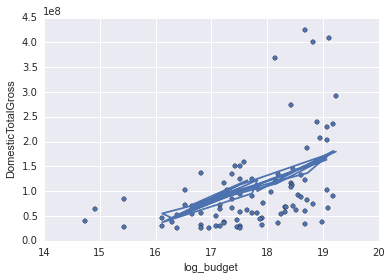

In [133]:
ax5=has_budget.plot('log_budget','DomesticTotalGross', kind='scatter')
ax5.plot(x_test5.log_budget, results5.predict(x_test5))

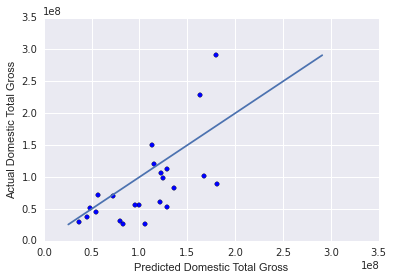

In [159]:
#Example:
#ax3=has_budget.plot('Budget','DomesticTotalGross', kind='scatter')
# ax3.plot(has_budget.Budget, results3.predict(has_budget.Budget))

plt.scatter(results5.predict(x_test5),y_test5)
xline=np.linspace(min(y_test5.DomesticTotalGross), max(y_test5.DomesticTotalGross), num=1000)
plt.plot(xline, xline)
plt.xlabel('Predicted Domestic Total Gross')
plt.ylabel('Actual Domestic Total Gross')
plt.show()

Is this heteroscedastic? No. While it is true that the residuals between the model and actual values are low for low values and higher for high values this can be accounted for by the increase in magnitude of the Domestic Total Gross itself. To demonstrate this, let's first look at a histogram of the residuals and then at a histogram for the percent error as a function of Domestic Total Gross.

for low Domestic Total Gross, the model performs quite well and the residuals are themselves lower and con However we see a greater margin of error as the Domestic Total Gross rises. 

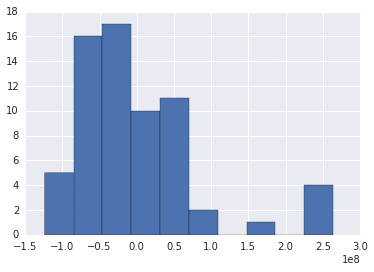

In [160]:
results5.resid.hist()

Overestimates tend to be more severe and have more variance than underestimates? I also believe this histogram is for residuals within the training set. How can we plot two histograms side by side, one for the residuals of the training set and another for the residauals of the test set? How can we then produce another two histograms demonstrating the percent error of the predicted values versus the actual values?

A quick google search uncovered the following article on Normal Probability Plots of Residuals:
https://onlinecourses.science.psu.edu/stat501/node/281